## CNN - CONVOLUTIONAL NEURAL NETWORKS

### Visualizing Feature maps

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F 

### Simple CNN Architecture

In [12]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=5, padding=2)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, padding=2)
        self.fc1 = nn.Linear(32*8*8, 128)
        self.fc2 = nn.Linear(128, num_classes)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32*8*8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
model = SimpleCNN()
print(model)

SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (fc1): Linear(in_features=2048, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


### Image we will extract features from

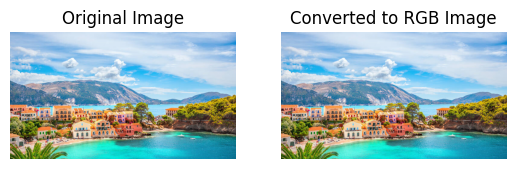

In [20]:
# loading the image
import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import transforms


img = Image.open("Greece.jpg")

# subplot
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(img.convert('RGB'))
plt.axis('off')
plt.title('Converted to RGB Image')
plt.show()



In [21]:
# Transform the image
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
])

img_t = transform(img.convert('RGB'))
img_t = img_t.unsqueeze(0)
print(img_t.shape)


torch.Size([1, 3, 32, 32])


### EXTRACTING AND VISUALIZING FEATURE MAPS

Feature maps: 1
Feature map shape: torch.Size([1, 16, 32, 32])


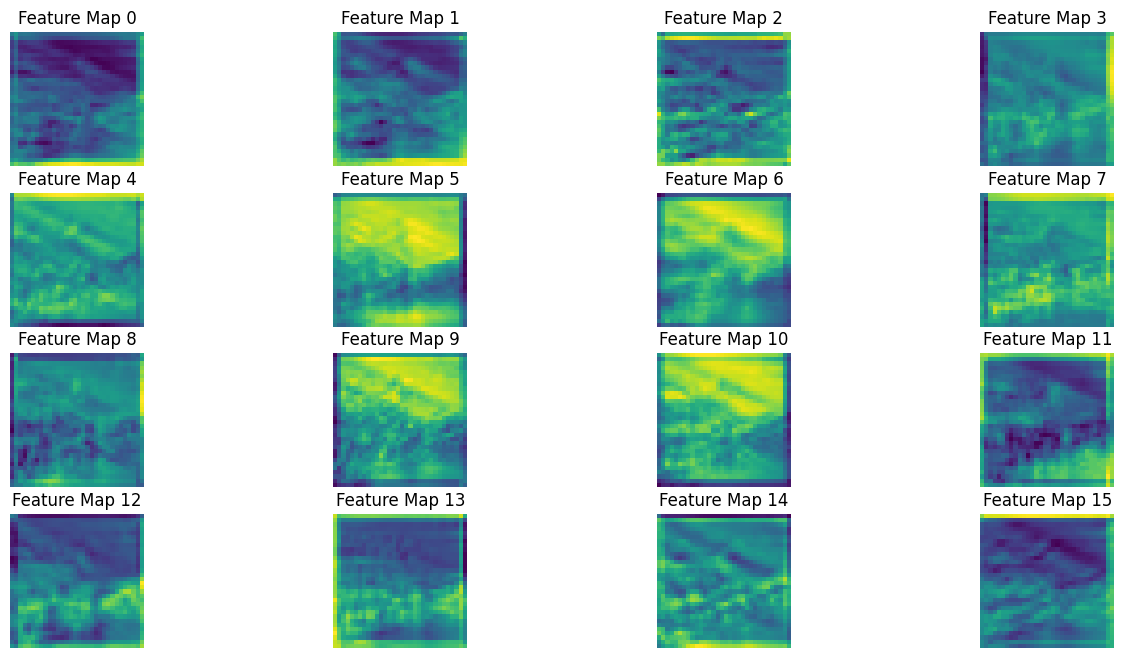

In [22]:
feature_maps = []

def hook(module, input, output):
    feature_maps.append(output)
    
model.conv1.register_forward_hook(hook)
model.eval()
with torch.no_grad():
    model(img_t)
    
print(f'Feature maps: {len(feature_maps)}')
print(f'Feature map shape: {feature_maps[0].shape}')

# Plot the feature maps
plt.figure(figsize=(16, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(feature_maps[0][0, i].detach().numpy())
    plt.axis('off')
    plt.title(f'Feature Map {i}')
plt.show()

### Combining Feature maps


torch.Size([16, 32, 32])


TypeError: Invalid shape (16, 32, 32) for image data

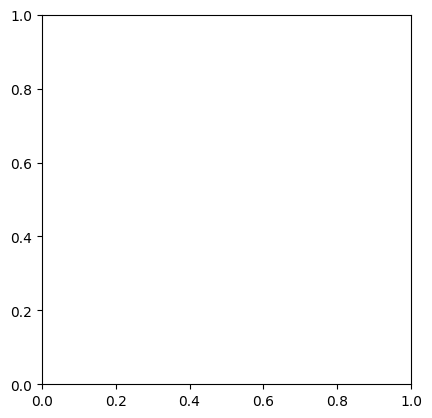

In [ ]:
# # combine the feature maps and plot
# plt.figure()
# combined = torch.cat(feature_maps, dim=1)
# combined = combined.squeeze(0)
# print(combined.shape)
# import matplotlib.pyplot as plt

# # Plot the combined feature map
# plt.imshow(combined.detach().cpu().numpy(), cmap='viridis')  # Use 'gray' for grayscale
# plt.axis('off')
# plt.title('Combined Feature Maps')
plt.show()